# HW 2

`12232267  蒋夏婷`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Significant earthquakes since 2150 B.C.
> The Significant Earthquake Database contains information on destructive earthquakes from 2150 B.C. to the present. On the top left corner, select all columns and download the entire significant earthquake data file in .tsv format by clicking the Download TSV File button. Click the variable name for more information. Read the file (e.g., earthquakes-2022-10-18_09-17-48_+0800.tsv) as an object and name it Sig_Eqs.

1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

In [94]:
data1 =pd.read_table('earthquakes-2022-10-20_21-52-40_+0800.tsv')

data1[['Country','location']] =data1['Location Name'].str.split(':',n=1, expand=True)
total_deaths_city =data1.groupby(['Country']).sum().Deaths
print('The top 20 countries along with the total number of deaths is as follow:\n',total_deaths_city.nlargest( n =20))


The top 20 countries along with the total number of deaths is as follow:
 Country
CHINA           2075019.0
TURKEY          1094479.0
IRAN             995403.0
ITALY            498477.0
SYRIA            369224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            277142.0
ARMENIA          191890.0
ISRAEL           160120.0
PAKISTAN         145080.0
ECUADOR          135479.0
IRAQ             120200.0
TURKMENISTAN     117412.0
PERU             101511.0
PORTUGAL          83506.0
GREECE            79278.0
CHILE             64269.0
INDIA             61940.0
TAIWAN            57134.0
Name: Deaths, dtype: float64


1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

Text(0.5, 0, 'year')

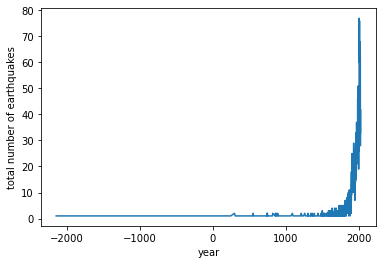

In [95]:
total_earth_mag30 =data1[data1.Mag >3.0].groupby('Year').count()
plt.plot(total_earth_mag30.index,total_earth_mag30['Location Name'])
plt.ylabel('total number of earthquakes')
plt.xlabel('year')

`There is a increasing trend of total number of the earthquakes along time, and shows a sharply upwards in recent years. This may because of the number of evidences the researchers can find, the later the richer`

1.3 [10 points] Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [108]:
def CountEq_LargestEq(country,df):
    data_country =df.loc[df.Country ==country.upper(),['Year','Mo','Dy','Hr','location','Mag']]
    if data_country.Mag.isnull().all():
        return len(data_country),'',''
    else:
        max_ind =data_country.loc[data_country.Mag.idxmax()].fillna('')

        total_number_eq = len(data_country) 
        largest_date =str(max_ind['Year'])+'-'+str(max_ind['Mo'])+'-'\
                        +str(max_ind['Dy'])+'-'+str(max_ind['Hr'])
        largest_loca =max_ind['location'].lstrip()

        return total_number_eq,largest_date,largest_loca

In [110]:
CountEq_LargestEq('china',data1)
print(data1.Mag.loc[data1.Country =='SYRIAN COASTS'])

7     NaN
520   NaN
Name: Mag, dtype: float64


In [122]:
all_country =[]
countries =data1.Country.drop_duplicates(keep='first').drop(0,axis=0)
for i in countries:
    if i == i:
        num,date,loca =CountEq_LargestEq(i,data1)
        all_country.append([i,data1.Mag.max(),num,date,loca])

all_countries =pd.DataFrame(all_country, columns=['country','mag','num','date','loca']).sort_values(by ='mag',ignore_index=True)
print(all_countries.country)

0                            JORDAN
1                  BRITISH COLUMBIA
2                             KENYA
3                    ISRAEL; JORDAN
4                CALIFORNIA, MEXICO
                   ...             
339                      COSTA RICA
340    W. LUZON ISLAND, PHILIPPINES
341    E. LUZON ISLAND, PHILIPPINES
342                      BANGLADESH
343                  NORTH CAROLINA
Name: country, Length: 344, dtype: object


## 2. Air temperature in Shenzhen during the past 25 years
In this problem set, we will examine how air temperature changes in Shenzhen during the past 25 years using the hourly weather data measured at the BaoAn International Airport. The data set is from NOAA Integrated Surface Dataset. Download the file Baoan_Weather_1998_2022.csv, move the .csv file to your working directory.

Read page 10-11 (POS 88-92 and POS 93-93) of the comprehensive user guide for the detailed format of the air temperature data (use column TMP). Explain how you filter the data in your report.

**[10 points]** Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 years?

In [123]:
data2 =pd.read_csv('Baoan_Weather_1998_2022.csv')

C:\Users\XuY\AppData\Local\Temp\ipykernel_15136\4071483546.py:1: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 =pd.read_csv('Baoan_Weather_1998_2022.csv')


## 3. Global collection of hurricanes
The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centres, as well as other organizations and individuals from around the world.

In this problem set, we will use all storms available in the IBTrACS record since 1842. Download the file ibtracs.ALL.list.v04r00.csv, move the .csv file to your working directory. Read Column Variable Descriptions for variables in the file. Examine the first few lines of the file.

Below we provide an example to load the file as a pandas dataframe. Think about the options being used and why, and modify when necessary.

### 3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).